In [2]:
## HR Analytics

In [3]:
### Step 1: Importing

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Importing all datasets
raw_data = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\Mentorship project\Recruitment_Data_updated.csv')
raw_data.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


In [9]:
# Let's check the dimensions of the dataframe
raw_data.shape

(107354, 4)

In [10]:
# let's look at the statistical aspects of the dataframe
raw_data.describe()

,attrition,performance_rating,sales_quota_pct
count,107354.000000,107354.000000,107354.000000
mean,0.213198,2.895066,1.082606
std,0.409639,0.682871,0.710279
min,-0.042386,0.964432,-0.739909
25%,-0.004684,2.022333,0.589342
50%,0.003484,2.998005,1.069800
75%,0.016809,3.010101,1.532299
max,1.038685,5.027383,3.701694


In [11]:
# Let's see the type of each column
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107354 entries, 0 to 107353
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attrition           107354 non-null  float64
 1   performance_rating  107354 non-null  float64
 2   sales_quota_pct     107354 non-null  float64
 3   recruiting_source   57753 non-null   object 
dtypes: float64(3), object(1)
memory usage: 3.3+ MB


In [30]:
# Check for missing values
raw_data.isnull().sum()

attrition                 0
performance_rating        0
sales_quota_pct           0
recruiting_source     49601
dtype: int64

In [31]:
# Fill missing values in recruiting_source with 'Unknown'
raw_data['recruiting_source'].fillna('Unknown', inplace=True)

# Verify if the missing values are filled
raw_data['recruiting_source'].isnull().sum()

0

In [32]:
# Convert binary categories (e.g., Attrition: Yes/No)
raw_data['attrition'] = raw_data['attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [33]:
# Check which columns are categorical
print(raw_data.select_dtypes(include='object').columns)

# Convert categorical columns into one-hot encoded columns
raw_data_encoded = pd.get_dummies(raw_data, columns=['recruiting_source'], drop_first=True)

# Display the first few rows of the newly encoded DataFrame
raw_data_encoded.head()


Index(['recruiting_source'], dtype='object')


,attrition,performance_rating,sales_quota_pct,recruiting_source_Campus,recruiting_source_Referral,recruiting_source_Search Firm,recruiting_source_Unknown
0,0,2.976686,0.604739,False,False,False,False
1,0,2.989157,0.396567,False,False,False,True
2,0,2.993355,0.206242,False,False,False,False
3,0,1.989966,-0.475037,False,False,False,True
4,0,3.016559,0.345470,True,False,False,False


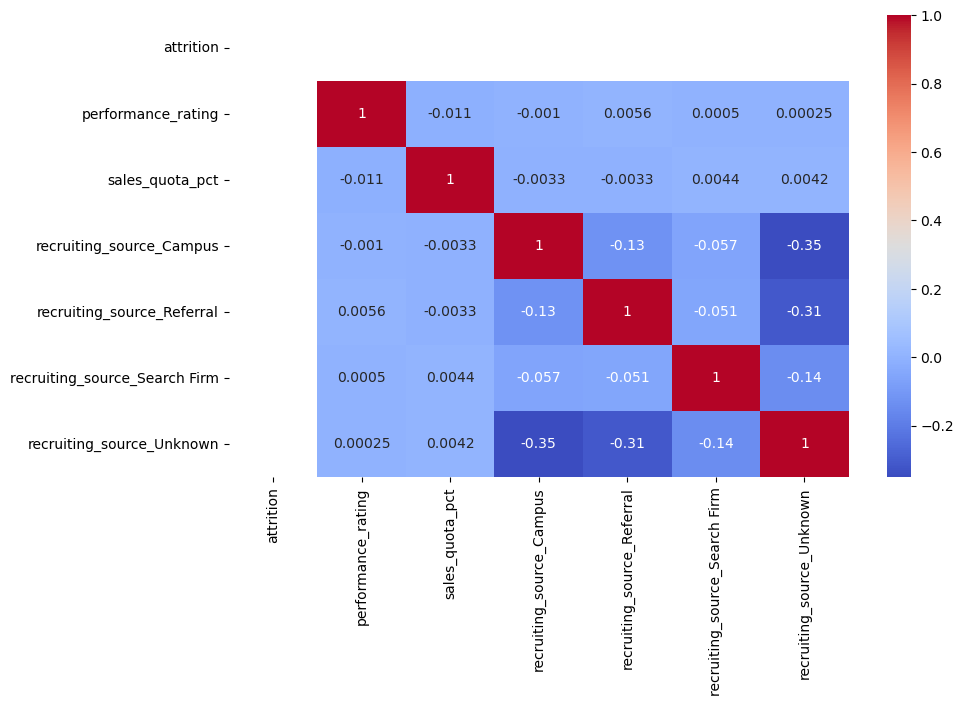

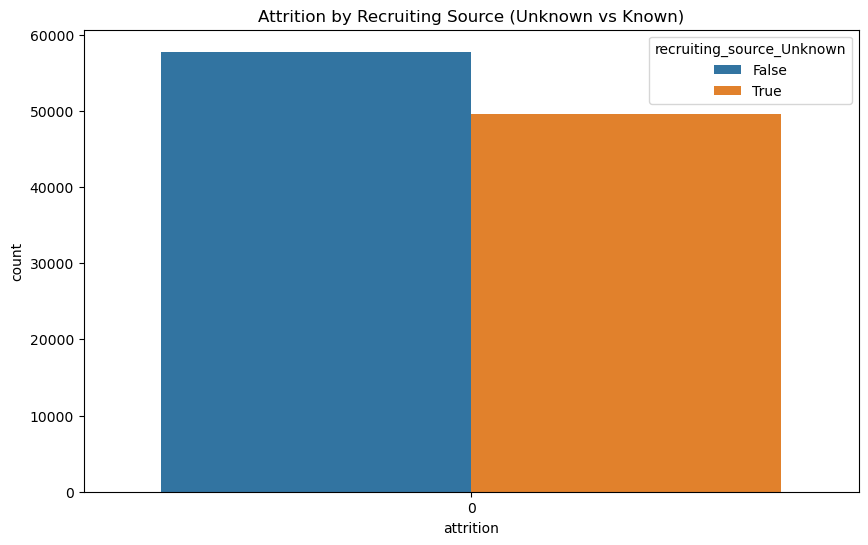

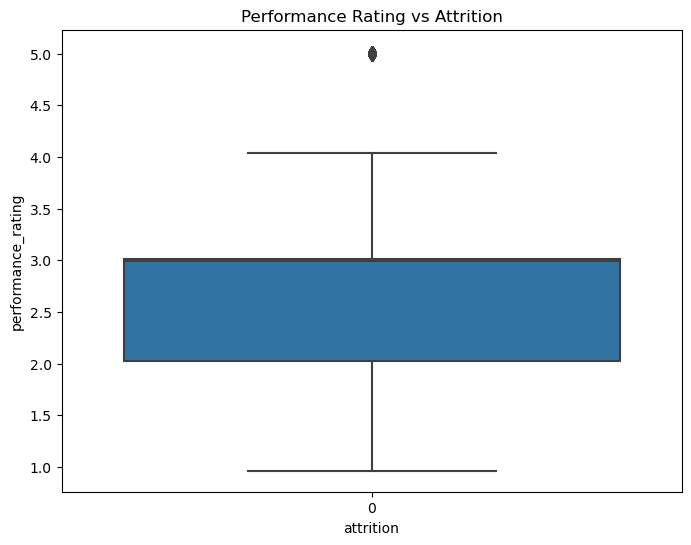

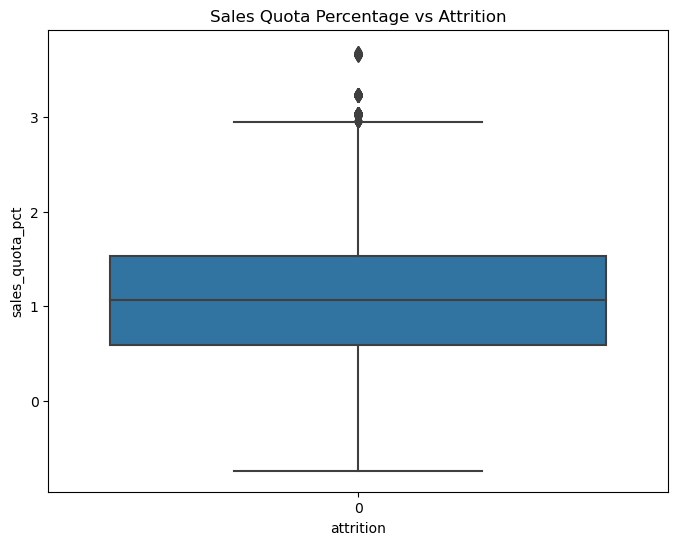

In [28]:
#EDA

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(raw_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

# Attrition distribution by recruiting source
plt.figure(figsize=(10, 6))
sns.countplot(x='attrition', hue='recruiting_source_Unknown', data=raw_data_encoded)
plt.title('Attrition by Recruiting Source (Unknown vs Known)')
plt.show()

# Boxplot: Performance rating vs Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='attrition', y='performance_rating', data=raw_data_encoded)
plt.title('Performance Rating vs Attrition')
plt.show()

# Sales quota vs attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='attrition', y='sales_quota_pct', data=raw_data_encoded)
plt.title('Sales Quota Percentage vs Attrition')
plt.show()

In [37]:
X = raw_data_encoded.drop(columns=['attrition'])  # Drop Employee ID and the target variable
y = raw_data_encoded['attrition']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Create the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)


Accuracy: 100.00%


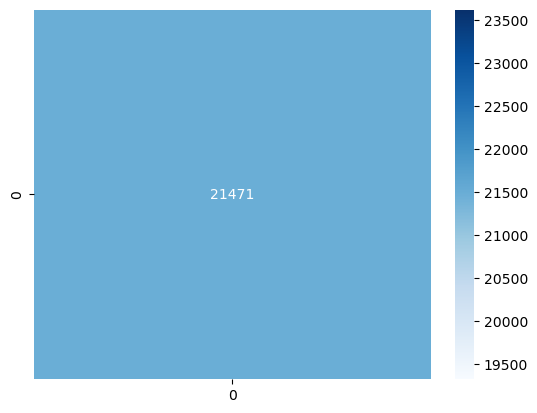

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21471

    accuracy                           1.00     21471
   macro avg       1.00      1.00      1.00     21471
weighted avg       1.00      1.00      1.00     21471



In [40]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


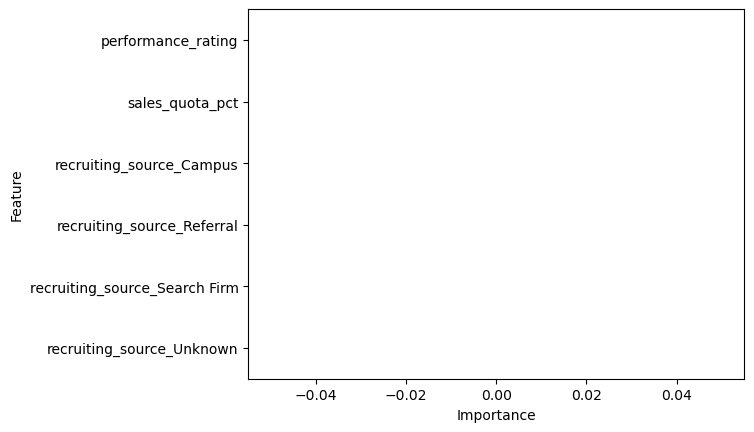

In [41]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.show()


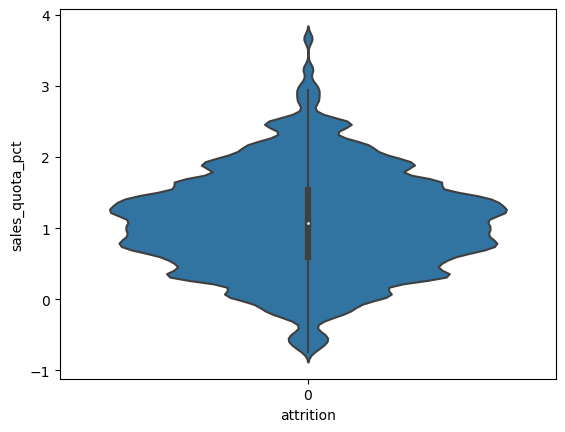

In [45]:
# Example: Plot the impact of Sales Quota on Attrition
sns.violinplot(x='attrition', y='sales_quota_pct', data=raw_data_encoded)
plt.show()
